In [1]:
%run rs2th_cwt_functions.ipynb

In [2]:
dr = 0.02;

In [3]:
niter = 10;

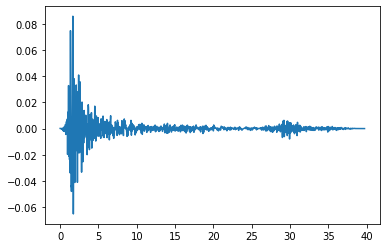

In [4]:
# Target Time History
# Read Acc. th
data = fileI('RSN23_SANFRAN_GGP010-1.AT2');
th = np.zeros(len(data)*5);
idx = 0;
for i in range(len(data)):
    for j in range(5):
        th[idx] = data[i,j];
        idx += 1;
dt = 0.005;
N = len(th);
tmax = dt*N;
time = np.arange(0,tmax,dt);
plt.plot(time,th);

In [5]:
# Target Response Spectra
# RVCH 
ft = np.array([1,  10, 20,  100.0]);  # frequency table
rt = np.array([1,  15, 15,  3]);  # response spectrum table

# log-log interp
freq = np.logspace(0,2,100);
resp_spec = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));
resp_spec_u = resp_spec*1.3;
resp_spec_l = resp_spec/1.1;

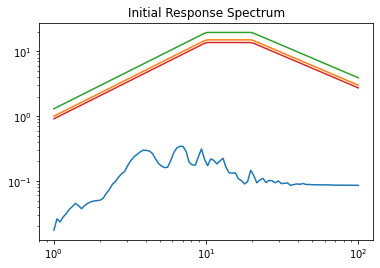

In [6]:
# Calculate response spectra of new time history for comparison
freq,rs = srs_sw_pa(freq,th,dr=dr,dt=dt);
#  Plot the response spectrum
plt.loglog(freq,rs);
plt.loglog(freq,resp_spec);
plt.loglog(freq,resp_spec_u);
plt.loglog(freq,resp_spec_l);
plt.title('Initial Response Spectrum');

In [7]:
# 3. Wavelet decomosition of time history
# a,ab,w,wb = cwt_newland1(ft=freq,k=30,time=time,th=th);
# th1 = icwt_newland(a,ab,w,wb);

In [8]:
# plt.plot(time,th,'k-');
# plt.plot(time,th1.real,'r--');

In [9]:
# Iteration
th1 = np.copy(th);
m=freq[:-1]
n=freq[1:]
f_points = (m+n)/2
resp1 = 10**np.interp(np.log10(f_points),np.log10(ft),np.log10(rt));
for iteration in range(niter):
    # 1. Calculate response spectra of time history
    freq,rs = srs_iso(freq,th1,dr=dr,dt=dt);
    # 2. Calculate adjustment coefficient
    resp2 = 10**np.interp(np.log10(f_points),np.log10(freq),np.log10(rs));
    cof = resp1/resp2;
    # 3. Wavelet decomosition of time history
    a_out,ab_out,w_out,wb_out = cwt_newland1(ft=freq,k=30,time=time,th=th1);
    # 4. New time history reconstruction  with adjustment coefficient
    a,ab,w,wb = a_out,ab_out,w_out,wb_out
    lenm = len(a[:,0]);
    lenk = len(a[0,:]);
    lent = len(w[0,:,0]);
    th1 = np.zeros(lent,'complex');
    for i in range(lenm):
        for j in range(lenk):
            th1 += cof[i]*(a[i,j]*w[i,:,j]+ab[i,j]*wb[i,:,j]);
    th1 = th1.real;
    th1[np.where(np.abs(th1)==max(np.abs(th1)))] /= 2;

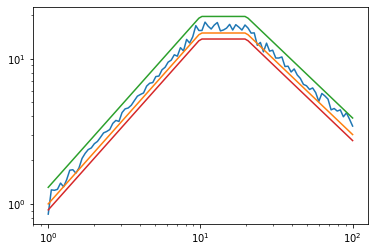

In [10]:
# 5. Calculate response spectra of new time history for comparison
th1 *= 1.1;
freq,rs1 = srs_iso(freq,th1,dr=dr,dt=dt);
# 6. Plot the response spectrum
plt.figure();
plt.loglog(freq,rs1);
plt.loglog(freq,resp_spec);
plt.loglog(freq,resp_spec_u);
plt.loglog(freq,resp_spec_l);

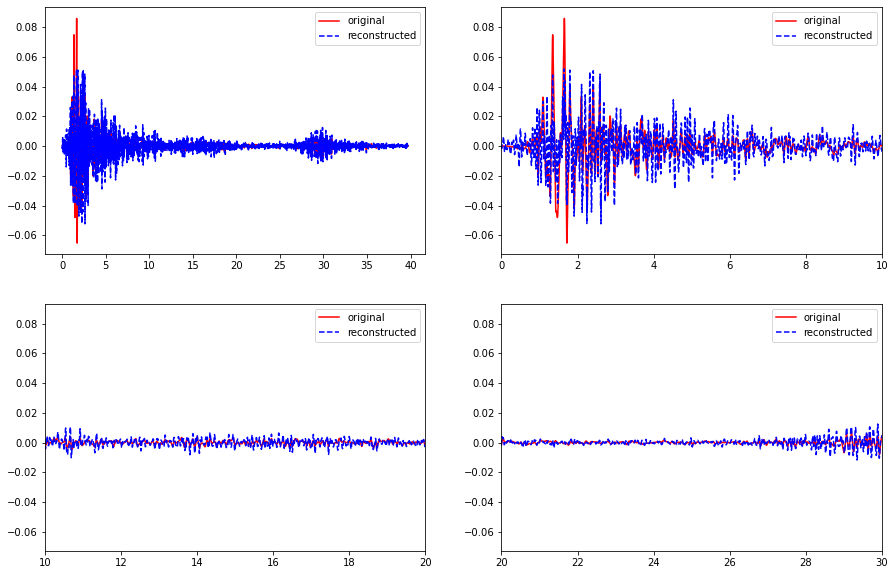

In [11]:
# 7. Normalize the new th using the ratio of norms of the time histories for comparison
new_th = th1*(np.linalg.norm(th)/np.linalg.norm(th1));
# 8. Plot time histories
plt.figure(figsize=(15,10));
plt.subplot(221);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.legend();
plt.subplot(222);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(0,10);
plt.legend();
plt.subplot(223);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(10,20);
#plt.ylim(-0.05,0.05);
plt.legend();
plt.subplot(224);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(20,30);
#plt.ylim(-0.01,0.01);
plt.legend();

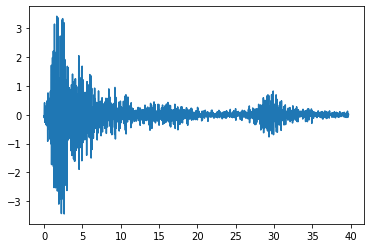

In [12]:
plt.plot(time,th1);

In [13]:
fileO(freq,rs1,'rs_syn_hwt1.txt');
fileO(time,th1.real,'th_syn_hwt1.txt');

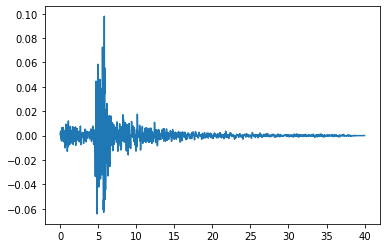

In [17]:
# Target Time History
# Read Acc. th
data = fileI('RSN1649_SMADRE_VAS000-1.AT2');
th1 = np.zeros(len(data)*5);
idx = 0;
for i in range(len(data)):
    for j in range(5):
        th1[idx] = data[i,j];
        idx += 1;
dt = 0.02;
N = len(th1);
tmax = dt*N;
time1 = np.arange(0,tmax,dt);
dt = 0.005;
time = np.arange(0,tmax,dt);
th = np.interp(time,time1,th1)
plt.plot(time,th);

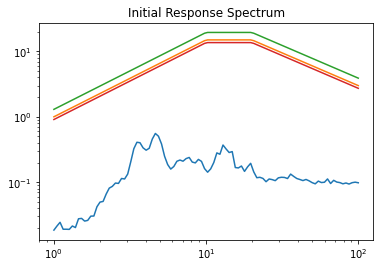

In [18]:
# Calculate response spectra of new time history for comparison
freq,rs = srs_iso(freq,th,dr=dr,dt=dt);
#  Plot the response spectrum
plt.loglog(freq,rs);
plt.loglog(freq,resp_spec);
plt.loglog(freq,resp_spec_u);
plt.loglog(freq,resp_spec_l);
plt.title('Initial Response Spectrum');

In [19]:
# 3. Wavelet decomosition of time history
# a,ab,w,wb = cwt_newland1(ft=freq,k=20,time=time,th=th);
# th1 = icwt_newland(a,ab,w,wb);

In [20]:
# plt.plot(time,th,'k-');
# plt.plot(time,th1.real,'r--',lw=0.2);

In [21]:
niter=1;
# Iteration
th1 = np.copy(th);
m=freq[:-1]
n=freq[1:]
f_points = (m+n)/2
resp1 = 10**np.interp(np.log10(f_points),np.log10(ft),np.log10(rt));

In [22]:
# Iteration
th1 = np.copy(th);
m=freq[:-1]
n=freq[1:]
f_points = (m+n)/2
resp1 = 10**np.interp(np.log10(f_points),np.log10(ft),np.log10(rt));
for iteration in range(niter):
    # 1. Calculate response spectra of time history
    freq,rs = srs_iso(freq,th1,dr=dr,dt=dt);
    # 2. Calculate adjustment coefficient
    resp2 = 10**np.interp(np.log10(f_points),np.log10(freq),np.log10(rs));
    cof = resp1/resp2;
    # 3. Wavelet decomosition of time history
    a_out,ab_out,w_out,wb_out = cwt_newland1(ft=freq,k=30,time=time,th=th1);
    # 4. New time history reconstruction  with adjustment coefficient
    a,ab,w,wb = a_out,ab_out,w_out,wb_out
    lenm = len(a[:,0]);
    lenk = len(a[0,:]);
    lent = len(w[0,:,0]);
    th1 = np.zeros(lent,'complex');
    for i in range(lenm):
        for j in range(lenk):
            th1 += cof[i]*(a[i,j]*w[i,:,j]+ab[i,j]*wb[i,:,j]);
    th1 = th1.real;
    th1[np.where(np.abs(th1)==max(np.abs(th1)))] /= 2;

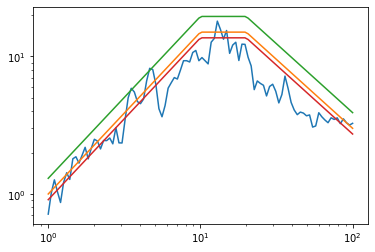

In [23]:
# 5. Calculate response spectra of new time history for comparison
th1 *= 1.1;
freq,rs1 = srs_iso(freq,th1,dr=dr,dt=dt);
# 6. Plot the response spectrum
plt.figure();
plt.loglog(freq,rs1);
plt.loglog(freq,resp_spec);
plt.loglog(freq,resp_spec_u);
plt.loglog(freq,resp_spec_l);

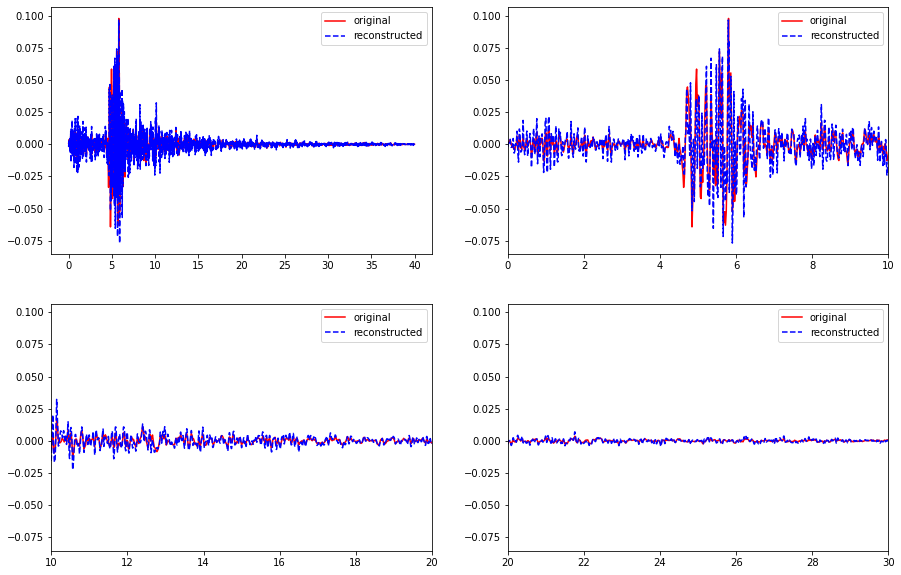

In [24]:
# 7. Normalize the new th using the ratio of norms of the time histories for comparison
new_th = th1*(np.linalg.norm(th)/np.linalg.norm(th1));
# 8. Plot time histories
plt.figure(figsize=(15,10));
plt.subplot(221);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.legend();
plt.subplot(222);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(0,10);
plt.legend();
plt.subplot(223);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(10,20);
#plt.ylim(-0.05,0.05);
plt.legend();
plt.subplot(224);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(20,30);
#plt.ylim(-0.01,0.01);
plt.legend();

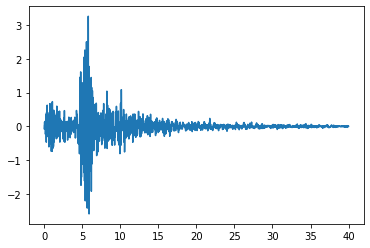

In [25]:
plt.plot(time,th1);

In [26]:
fileO(freq,rs1,'rs_syn_hwt2.txt');
fileO(time,th1.real,'th_syn_hwt2.txt');